<a href="https://colab.research.google.com/github/Rubenlop/Differential-equiations/blob/main/WAVE_EQUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WAVE EQUATION




We want to consider a vertical string of length $L$ that has been tightly stretched between two points at $x = 0$ and  $x = L$.

Because the string has been tightly stretched we can assume that the slope of the displaced string at any point is small. So just what does this do for us? Let’s consider a point x on the string in its equilibrium position, i.e. the location of the point at $t = 0$. As the string vibrates this point will be displaced both vertically and horizontally, however, if we assume that at any point the slope of the string is small then the horizontal displacement will be very small in relation to the vertical displacement. This means that we can now assume that at any point 
x on the string the displacement will be purely vertical. So, let’s call this displacement $u(x,t)$.

We are going to assume, at least initially, that the string is not uniform and so the mass density of the string, $ρ(x)$ may be a function of $x$.

Next, we are going to assume that the string is perfectly flexible. This means that the string will have no resistance to bending. This in turn tells us that the force exerted by the string at any point $x$ on the endpoints will be tangential to the string itself. This force is called the tension in the string and its magnitude will be given by $T(x, t)$.

Finally, we will let 
$Q(x,t)$ represent the vertical component per unit mass of any force acting on the string.

Provided we again assume that the slope of the string is small the vertical displacement of the string at any point is then given by,

$ρ (x) \frac{\partial^2 u}{\partial t^2} = \frac{\partial}{\partial x} \left( T(x,t) \frac{\partial u}{\partial x} \right) + ρ (x) Q(x,t)$

This is a very difficult partial differential equation to solve so we need to make some further simplifications.

First, we’re now going to assume that the string is perfectly elastic. This means that the magnitude of the tension, 
$T(x,t)$, will only depend upon how much the string stretches near $x$. Again, recalling that we’re assuming that the slope of the string at any point is small this means that the tension in the string will then very nearly be the same as the tension in the string in its equilibrium position. We can then assume that the tension is a constant value, $T(x,t)=T_0$.

Further, in most cases the only external force that will act upon the string is gravity and if the string light enough the effects of gravity on the vertical displacement will be small and so will also assume that 
$Q(x,t)=0$. This leads to

$ρ \frac{\partial ^2 u}{\partial t^2} = T_0 \frac{\partial ^2 u}{\partial x^2}$

If we now divide by the mass density and define,

$c^2 = \frac{T_0}{ρ}$

we arrive at the 1-D **wave equation**,

$ \frac{\partial ^2 u}{\partial t^2} = c^2 \frac{\partial ^2 u}{\partial x^2}$

In the previous section when we looked at the heat equation he had a number of boundary conditions however in this case we are only going to consider one type of boundary conditions. For the wave equation the only boundary condition we are going to consider will be that of prescribed location of the boundaries or,

$u(0,t) = h_1(t)$ and $u(L,t) = h_2(t)$

The initial conditions (and yes we meant more than one…) will also be a little different here from what we saw with the heat equation. Here we have a 2nd order time derivative and so we’ll also need two initial conditions. At any point we will specify both the initial displacement of the string as well as the initial velocity of the string. The initial conditions are then,

$u(x,0) = f(x)$ and $\frac{\partial u}{\partial t}(x,0) = g(x)$

We will solve the next differential equation model on $[0,\pi]$x$[0,10]$

$\frac{\partial ^2 u}{\partial t^2}(x,t) = \frac{\partial ^2 u}{\partial x^2}(x,t)$

Whith the initial condition $u(x,0) = sin(x)$, $u_t (x,0)= 0$ and boundary conditions $u(0,t) = 0$, $u(\pi, t) = 0$

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import math as mt

In [ ]:
delta_x = 0.2
delta_t = 0.04
k = 1
## Vector de valores de x en el intervalo [0,1] con paso 0.2
x = np.arange(0,mt.pi ,delta_x)
## Vector de valores del tiempo en el intervalo [0,1] con paso de 0.1
time = np.arange(0, 10, delta_t)
## Condiciones iniciales
## Valor de la función el el tiempo  U(x,t=0) = 0 
u_x_0 = np.sin(x)
## Drivada parcial temporal
u_x_dt0 = 0
### Condiciones de frontera
u_0_t = 0
u_1_t = 0

In [ ]:
N = len(x)
M = len(time)
lam = k * (delta_t)/(delta_x)

In [ ]:
matrix_u = np.zeros( (N, M) )
matrix_u[:,0] = u_x_0

matrix_u[0,:] = u_0_t
matrix_u[-1,:] = u_1_t

for j in range(0,M-1):
  for i in range(1,N-1):
    if j == 0:
      matrix_u[i,j+1] = matrix_u[i,j] + (delta_t) * (u_x_dt0)
    else:
      matrix_u[i,j+1] = 2*(1 - lam*lam)*matrix_u[i,j] + (lam*lam)*( matrix_u[i+1,j] + matrix_u[i-1,j]) - matrix_u[i,j-1] 

matrix_u

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19866933,  0.19866933,  0.19835252, ..., -0.11009939,
        -0.09411071, -0.07798149],
       [ 0.38941834,  0.38941834,  0.38879735, ..., -0.21216887,
        -0.18470777, -0.15902891],
       ...,
       [ 0.51550137,  0.51550137,  0.51467932, ..., -0.25309399,
        -0.24440913, -0.23566633],
       [ 0.33498815,  0.33498815,  0.32880915, ..., -0.14562798,
        -0.13464365, -0.12266418],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

(-0.49800000000000005, 10.458, -0.15000000000000002, 3.15)

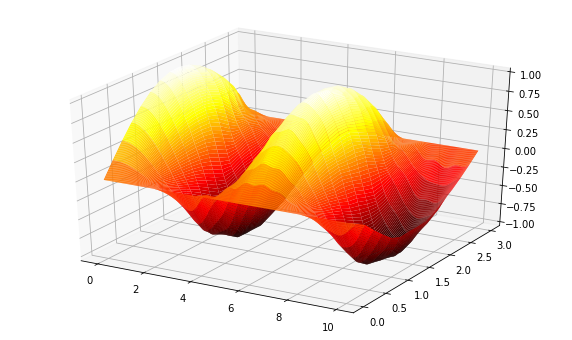

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca(projection='3d')
T, X = np.meshgrid(time, x)
surface = ax.plot_surface(T, X, matrix_u, rstride=1, cstride=1, cmap='hot')
ax.axis()